In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
N=100   #데이터생성 100개할거다
K=3   #3진분류를 사용하기위해

T3=np.zeros((N,3),dtype=np.uint8)  # 100x3짜리 메트릭스
T2=np.zeros((N,2),dtype=np.uint8)  # 100x2짜리 메트릭스
X=np.zeros((N,2))  #입력
X_range0=[-3,3]  #x가 가질수있는값의범위
X_range1=[-3,3]
Mu=np.array([[-0.5,-0.5],[0.5,1],[1,-0.5]])  #가우시안분포를 만들기위해 가우시안부포의 평균값만듦
Sig=np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]]) #가우시안분포의 표준편차 (시그마)  분산은 시그마의 제곱 
Pi=np.array([0.4,0.8,1])  #클래스를 3분할해줌  0~0.4는 클래스1 이런식으로

for n in range(N):   #100번
    wk=np.random.rand()  #100개의 0~1사이의 랜덤넘버를 wk에 저장
    for k in range(K):  #3번 즉 클래스0번 클래스1번 클래스2번 즉 3class데이터를 먼저만듬
        if wk<Pi[k]:   #wk가 Pi[0]인 0.4보다 작으면 T3에 1을넣어줌 
            T3[n,k]=1
            break
    for k in range(2):  #2번
        X[n,k]=np.random.randn() * Sig[T3[n,:]==1,k] + Mu[T3[n,:]==1,k] 
                 #randn은 정규분포를 따르는 난수, 그거에 표준편차를 곱해주고 평균을 더해줌
                #X와 T3가 만들어짐 T3=[ㅇ0 ㅇ1 ㅇ2]
T2[:,0]=T3[:,0]
T2[:,1]=T3[:,1] | T3[:,2]  #T2=[ㅇ0,ㅇ1 | ㅇ2]

print(X[:5,:])
print(T2[:5,:])
print(T3[:5,:])

#결과 첫번째그룹(소수존나긴거)는 x0과 x1이다
#결과 두번째그룹은 T2 , 얘네 1행은 T3의 1행과 같고 2행은 T3의 2행 3행을 OR한값이다
#결과 세번째그룹은 T3

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [17]:
#[[-0.14173827  0.86533666]  얘네들은 x0,x1
# [-0.86972023 -1.25107804]
# [-2.15442802  0.29474174]
# [ 0.75523128  0.92518889]
# [-1.10193462  0.74082534]]

#[[0 1] class0  얘네들은 T2
# [1 0] class1
# [1 0] class1
# [0 1] class0
# [1 0]] class1

#[[0 1 0] class0 얘네들은 T3
# [1 0 0] class1
# [1 0 0] class1
# [0 1 0] class0
# [1 0 0]] class1

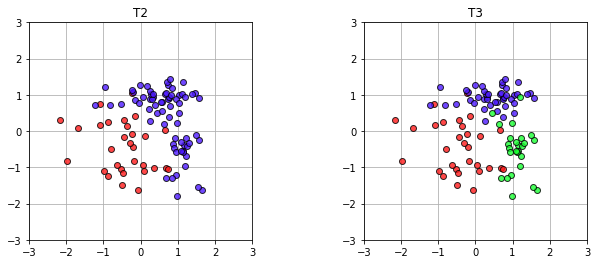

In [18]:
def show_data2(x,t):
    wk,K=t.shape
    c=[[1,0.1,0.1],[0.3,0.1,1],[0.1,1,0.2]]
    for k in range(K):
        plt.plot(X[t[:,k]==1,0],x[t[:,k]==1,1],linestyle='none',markeredgecolor='black',marker='o',color=c[k],alpha=0.8)
        plt.grid(True)
            
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X,T2)
plt.title("T2")
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X,T3)
plt.title("T3")
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

#이제 결정경계를 잘 그려야한다

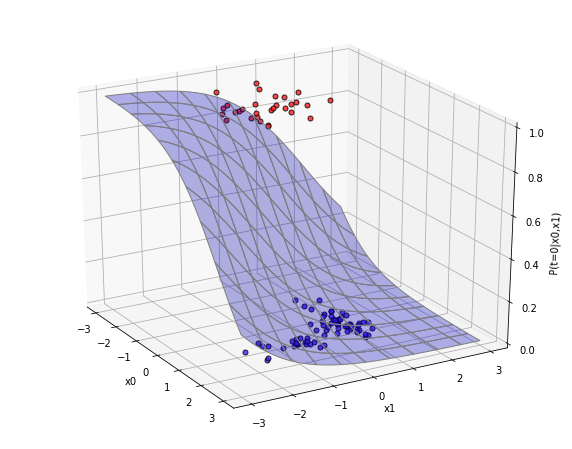

In [19]:
def logistic2(x0,x1,w):   #3차원 로지스틱함수정의
    y=1/(1+np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax,w):
    xn=50  #x0의 격자와 x1의 격자를 50개씩생성할거다
    x0=np.linspace(X_range0[0],X_range0[1],xn)  #이렇게 50등분
    x1=np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1=np.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)   #각각의 격자에서 로지스틱함수의 연산(실질적연산)
    ax.plot_surface(xx0,xx1,y,color='blue',edgecolor='gray',rstride=5,cstride=5,alpha=0.3)  #점찍어주는 루틴

def show_data2_3d(ax,x,t):
    c=[[1,0.1,0.1],[0.3,0.1,1]]
    for i in range(2):
        ax.plot(x[t[:,i]==1,0],x[t[:,i]==1,1],1-i,marker='o',color=c[i],markeredgecolor='black',linestyle='none',markersize=5,alpha=0.8)
        ax.view_init(elev=25,azim=-30)
        ax.set_xlabel('x0')
        ax.set_ylabel('x1')
        ax.set_zlabel('P(t=0|x0,x1)')  #x0,x1일때  class 0일확률
        
plt.figure(figsize=(10,8))
Ax=plt.subplot(1,1,1,projection='3d')
W=[-1,-1,-1]  #w0,w1,w2를 최적화해야한다. 하지만 아직 모른다 그러므로 일단 전부 -1로 세팅한거임
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)

#얘네는 점들과 평면이 좀 많이 떨어져있다



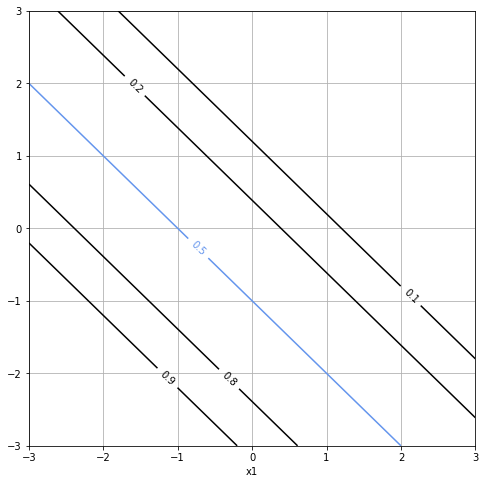

In [20]:
def show_contour_logistic2(w):   #위 그래프를 등고선으로 나타내보자
    xn=30
    x0=np.linspace(X_range0[0],X_range0[1],xn)   #마찬가지로 x0과x1을 30등분격자로
    x1=np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1=np.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)   #위의 평면임
    cont=plt.contour(xx0,xx1,y,levels=(0.1,0.2,0.5,0.8,0.9),colors=['k','k','cornflowerblue','k','k'])
    #5개 레벨에 대해서 등고선을 그려라
    #0.1 , 0.2 , 0.8 , 0.9는 k색깔(검정색)으로 0.5는 콘플라워블루 색깔로 그려라
    cont.clabel(fmt='%.1f',fontsize=10)
    plt.xlabel('x0')
    plt.xlabel('x1')
    plt.grid(True)
                                                                    
plt.figure(figsize=(8,8))
W=[-1,-1,-1]                                                        
show_contour_logistic2(W)                                                                

In [24]:
def cee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    cee=0
    
    for n in range(len(y)):
        cee=cee-(t[n,0]*np.log(y[n])+(1-t[n,0])*np.log(1-y[n])) #ppt참조. 식을표현한것임
    cee=cee/X_n
    return cee

def dcee_logistic2(w,x,t):
    X_n=x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    dcee=np.zeros(3)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n,0])*x[n,0]
        dcee[1]=dcee[1]+(y[n]-t[n,0])*x[n,1]
        dcee[2]=dcee[2]+(y[n]-t[n,0])
    dcee=dcee/X_n
    return dcee

W=[-1,-1,-1]
dcee_logistic2(W, X, T2)

#기울기가 모두 0.몇이다 즉 W=[-1,-1,-1]인 지점의 기울기는 평탄하다.

array([ 0.10272008,  0.04450983, -0.06307245])

w0=-3.70,w1=-2.54,w2=-0.28
CEE=0.22


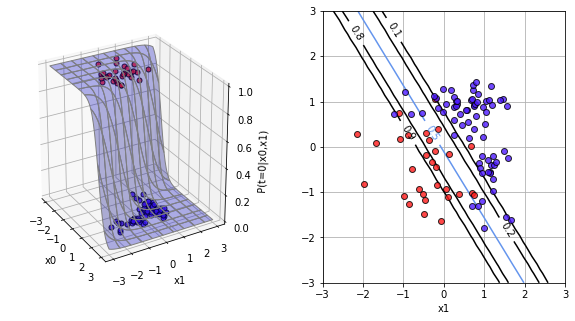

In [25]:
#사이파이 라이브러리의 미니마이즈함수로 경사하강법사용해서 최적W를 구한다
from scipy.optimize import minimize

def fit_logistic2(w_init,x,t):  #입력데이터를 넣어주면 최적의 w를 구해줌
    res=minimize(cee_logistic2,w_init,args=(x,t),jac=dcee_logistic2,method="CG")  
    #교차엔트로피함수(cee)를 미니마이즈(최적화)한다. args=(x,t)이거는 x와t는 제공을 받았으니 w에 대해서 최적화를 한다는뜻
    #jac=dcee_logistic2 이거는 기울기함수  CG는 conjugate Gradient 함수
    return res.x 

plt.figure(1,figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

Ax=plt.subplot(1,2,1,projection='3d')
W_init=[-1,0,0]
W=fit_logistic2(W_init,X,T2)
print("w0={0:.2f},w1={1:.2f},w2={2:.2f}".format(W[0],W[1],W[2]))
show3d_logistic2(Ax,W)

show_data2_3d(Ax,X,T2)
cee=cee_logistic2(W,X,T2)
print("CEE={0:.2f}".format(cee))

Ax=plt.subplot(1,2,2)
show_data2(X,T2)
show_contour_logistic2(W)
plt.show()

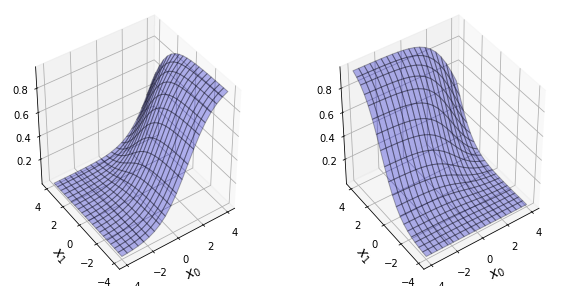

In [26]:
def softmax(x0,x1,x2):   #여기서는 3분류가아닌 2분류만해봄
    u=np.exp(x0)+np.exp(x1)+np.exp(x2)
    return np.exp(x0)/u, np.exp(x1)/u, np.exp(x2)/u

xn=20
x0=np.linspace(-4,4,xn)
x1=np.linspace(-4,4,xn)

y=np.zeros((xn,xn,3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0,:]=softmax(x0[i0],x1[i1],1)
        
xx0,xx1=np.meshgrid(x0,x1)
plt.figure(figsize=(10,5))
for i in range(2):
    ax=plt.subplot(1,2,i+1,projection='3d')
    ax.plot_surface(xx0,xx1,y[:,:,i],rstride=1, cstride=1,alpha=0.3,color='blue',edgecolor='black')
    ax.set_xlabel('$x_0$',fontsize=14)
    ax.set_ylabel('$x_1$',fontsize=14)
    ax.view_init(40,-125)
    
plt.show()

In [27]:
def logistic3(x0,x1,w):   #3클래스 분류 (소프트맥스함수)
    K=3
    w=w.reshape((3,3))   # w.reshape((3,3))는 w라는 벡터를 3x3으로 바꿔라, 만약 [123 456 789]라는 백터면 [[123],[456],[789]] 이렇게 3x3으로바꿔라
                        # w는 모델의 매개변수
    n=len(x1)
    y=np.zeros((n,K))
    for k in range(K):
        y[:,k]=np.exp(w[k,0]*x0 + w[k,1]*x1 + w[k,2])  #exp(w[k,0]*x0 + w[k,1]*x1 + w[k,2])이거를 3개만듬 그거를 각각 y에 넣어줌
    wk=np.sum(y,axis=1)  # n행K열의 행렬y의 합을 구해줌 axis=1은 행방향으로 더하라는뜻
    wk=y.T/wk  # y.T는 y의 transpose연산
    y=wk.T
    return y

W=np.array([1,2,3,4,5,6,7,8,9])
y=logistic3(X[:3,0],X[:3,1],W)
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


In [29]:
def cee_logistic3(w,x,t):
    X_n=x.shape[0]
    y=logistic3(x[:,0],x[:,1],w)
    cee=0
    N,K=y.shape
    for n in range(N):
        for k in range(K):
            cee=cee-(t[n,k]*np.log(y[n,k]))
    cee=cee/X_n
    return cee

W=np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W,X,T3)

3.9824582404787288

In [32]:
def dcee_logistic3(w,x,t):
    X_n=x.shape[0]
    y=logistic3(x[:,0],x[:,1],w)
    dcee=np.zeros((3,3))
    N,K=y.shape
    for n in range(N):
        for k in range(K):
            dcee[k,:]=dcee[k,:]-(t[n,k]-y[n,k])*np.r_[x[n,:],1]
    dcee=dcee/X_n
    return dcee.reshape(-1)

W=np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE=0.23


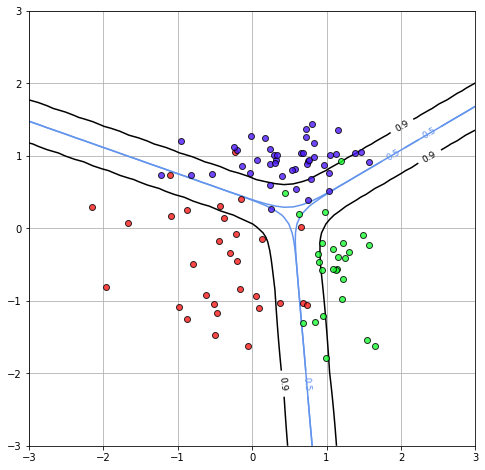

In [34]:
def fit_logistic3(w_init,x,t):  #경사하강법으로 최적값구하기
    res=minimize(cee_logistic3, w_init, args=(x,t), jac=dcee_logistic3, method='CG')
    return res.x

def show_contour_logistic3(w):
    xn=50
    x0=np.linspace(X_range0[0], X_range0[1], xn)
    x1=np.linspace(X_range1[0], X_range1[1], xn)
    
    xx0,xx1=np.meshgrid(x0,x1)
    y=np.zeros((xn,xn,3))
    for i in range(xn):
        wk=logistic3(xx0[:,i], xx1[:,i], w)
        for j in range(3):
            y[:,i,j]=wk[:,j]
    for j in range(3):
        cont=plt.contour(xx0,xx1,y[:,:,j],levels=(0.5,0.9),colors=['cornflowerblue','k'])
        cont.clabel(fmt='%.1f',fontsize=9)
    plt.grid(True)
    
W_init=np.zeros((3,3))
W=fit_logistic3(W_init,X,T3)
print(np.round(W.reshape(3,3),2))
cee=cee_logistic3(W,X,T3)
print("CEE={0:.2f}".format(cee))

plt.figure(figsize=(8,8))
show_data2(X,T3)
show_contour_logistic3(W)
plt.show()

#연한파란색이 소프트함수함수값이 0.5가되는, 즉 결정경계가 된다
#만약 제 3의 데이터가 들어왔는데 위쪽에 점이 찍히면 클래스1 
#왼쪽아래면 클래스0 오른쪽아래면 클래스2일 확률이 1이다 라는의미의 그래프이다